## Dataset

A transnational data set which contains all the transactions occurring between 01/12/2021 and 09/12/2022 for a UK-based and registered non-store online retail.

## To-dos

- [x] EDA
- [x] Build Cohort Analytics
- [x] Retention Rate
- [x] Churn Rate
- [x] Customer Retention KPIs
- [x] Build RFM model
- [x] CLV Basic, BG-NBD, Gamma Gamma
- [x] Predict


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import gdown

In [2]:

file_id = "1zV8hd8avaucgIWvA7fgLdaD6ldheOf3r"
url = f"https://drive.google.com/uc?id={file_id}"
output = "clv.csv"
gdown.download(url, output, quiet=False)
df_clv = pd.read_csv(output)
df_clv

Downloading...
From: https://drive.google.com/uc?id=1zV8hd8avaucgIWvA7fgLdaD6ldheOf3r
To: /workspaces/Customer_Retention/clv.csv
100%|██████████| 115k/115k [00:00<00:00, 21.7MB/s]


,recency,T,frequency,monetary
0,0,325,1,77183.600000
1,365,367,182,23.681319
2,282,358,31,57.975484
3,0,18,73,24.076027
4,0,310,17,19.670588
...,...,...,...,...
4333,0,277,10,18.060000
4334,0,180,7,11.545714
4335,118,126,12,14.837500
4336,333,337,721,2.837074


### Content
* InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

* StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

* Description: Product (item) name. Nominal.

* Quantity: The quantities of each product (item) per transaction. Numeric.

* InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated.

* UnitPrice: Unit price. Numeric, Product price per unit in sterling.

* CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

* Country: Country name. Nominal, the name of the country where each customer resides.



### 1. Data Overview
To be honest, this dataset isn't very big, and overall, it is quite clear and comprehensive, making it easy for us to analyze. Let's take a look at the data.

In [2]:

file_id = "1MYVxfXHHXC6GpmHjL8GOu632l2ruz41R"
url = f"https://drive.google.com/uc?id={file_id}"
output = "online_retail.csv"
gdown.download(url, output, quiet=False)
df = pd.read_csv(output)
df

Downloading...
From: https://drive.google.com/uc?id=1MYVxfXHHXC6GpmHjL8GOu632l2ruz41R
To: /workspaces/Customer_Retention/online_retail.csv
100%|██████████| 47.8M/47.8M [00:00<00:00, 54.7MB/s]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2021-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2021-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2021-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2021-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2021-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2022-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2022-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2022-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2022-12-09 12:50:00,4.15,12680.0,France


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
df.shape

(541909, 8)

In [9]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [10]:
df.dtypes.value_counts()

,count
object,5
float64,2
int64,1


### 2.Explore Data

In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [4]:
df[df.isna().any(axis = 1)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2021-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2021-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2021-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2021-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2021-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2022-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2022-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2022-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2022-12-09 10:26:00,10.79,NaN,United Kingdom


But if y want see more details about dataset, we will create a comprehensive report for you.

In [6]:
from ydata_profiling import ProfileReport
report = ProfileReport(df)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]


After we create this report, we can clearly observe each part and feature of all columns in dataset. Y can see that it not only evaluates the overall data but also divides each column and analyzes parameters such as distinct rows, missing values, the memory size, or many types of data, mean value, median value.... </br>
And if y want to know any informations for the column you choose, the report has a `more details` button for you under each the description of column</br>
Moreover, it directly visualizes the values that are in the column using suitable charts. This shows me the correlation coefficients and interactions between variables; many other relationships are related and need processing. Besides,missing values or duplicate rows are likewise indicated by several separate tables.

### 3.Clean Data
We will drop rows with CustomerID missing value

In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [3]:
df = df.dropna(subset = 'CustomerID')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2021-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2021-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2021-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2021-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2021-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2022-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2022-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2022-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2022-12-09 12:50:00,4.15,12680.0,France


In [9]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

When checking the duplicate values, we see other elements of duplicated rows are different and have distinct values. So, we need to keep them to avoid wrong statistics.</br>
And noted that: the minimum for unit price > 0 and the minimum for quantity > 0

In [11]:
df.duplicated().sum()

np.int64(5225)

In [4]:
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2021-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2021-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2021-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2021-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2021-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2022-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2022-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2022-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2022-12-09 11:34:00,2.10,14446.0,United Kingdom


And noted that: the minimum for unit price > 0 and the minimum for quantity > 0. We should filter values out that are outside this range.

In [4]:
df = df[(df['UnitPrice'] > 0) & (df['CustomerID'] > 0)]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2021-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2021-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2021-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2021-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2021-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2022-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2022-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2022-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2022-12-09 12:50:00,4.15,12680.0,France


### 4. Making cohort analysis and customer behavior

To make cohort analysis, we need to have the following group fields :
* `InvoiceMonth` - đại diện cho năm tháng xảy ra giao dịch
* `CohortMonth` - đại diện cho năm tháng khách hàng mua lần đầu tiên
* `CohortIndexMonth` - 1 số tự nhiên ghi lại vòng đời của mỗi khách hàng, có thể là số tháng trôi qua kể từ lần đầu tiên mua...

In [5]:
import datetime as dt
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors = 'coerce')
def extract_month(x):
   return dt.datetime(x.year, x.month, 1)

df['InvoiceMonth'] = df['InvoiceDate'].apply(extract_month)
group = df.groupby('CustomerID')['InvoiceMonth']
df['CohortMonth'] = group.transform('min')
df.tail()

/tmp/ipykernel_1814/2276177060.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors = 'coerce')
/tmp/ipykernel_1814/2276177060.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceMonth'] = df['InvoiceDate'].apply(extract_month)
/tmp/ipykernel_1814/2276177060.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2022-12-09 12:50:00,0.85,12680.0,France,2022-12-01,2022-08-01
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2022-12-09 12:50:00,2.10,12680.0,France,2022-12-01,2022-08-01
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2022-12-09 12:50:00,4.15,12680.0,France,2022-12-01,2022-08-01
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2022-12-09 12:50:00,4.15,12680.0,France,2022-12-01,2022-08-01
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2022-12-09 12:50:00,4.95,12680.0,France,2022-12-01,2022-08-01


In [6]:
def extract_element(data,column):
    year = data[column].dt.year
    month = data[column].dt.month
    day = data[column].dt.day
    return year, month

invoice_year, invoice_month = extract_element(df,'InvoiceMonth')
cohort_year, cohort_month = extract_element(df,'CohortMonth')
year_range = invoice_year - cohort_year
month_range = invoice_month - cohort_month

df['CohortIndexMonth'] = year_range * 12 + month_range + 1
df.tail()

/tmp/ipykernel_1814/3767687852.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CohortIndexMonth'] = year_range * 12 + month_range + 1


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndexMonth
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2022-12-09 12:50:00,0.85,12680.0,France,2022-12-01,2022-08-01,5
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2022-12-09 12:50:00,2.10,12680.0,France,2022-12-01,2022-08-01,5
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2022-12-09 12:50:00,4.15,12680.0,France,2022-12-01,2022-08-01,5
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2022-12-09 12:50:00,4.15,12680.0,France,2022-12-01,2022-08-01,5
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2022-12-09 12:50:00,4.95,12680.0,France,2022-12-01,2022-08-01,5


Next, we also count how many mew customers we have each month (CohortMonth)

Key Difference
* Single-column grouping ('CohortMonth'): Groups data by the broader cohort, ignoring the CohortIndexMonth (position in the cohort).
* Multi-column grouping (['CohortMonth', 'CohortIndexMonth']): Groups data by each unique pairing of CohortMonth and CohortIndexMonth, allowing for analysis at the cohort’s position level.

In [7]:
group2 = df.groupby(['CohortMonth','CohortIndexMonth'])
cohort_data = group2['CustomerID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_data = cohort_data.pivot( index = 'CohortMonth', columns = 'CohortIndexMonth')
cohort_data.index = cohort_data.index.strftime("%b %Y")
cohort_data

# cohort_data['CustomerID'][1]

CustomerID                                                   \
CohortIndexMonth         1      2      3      4      5      6      7      8    
CohortMonth                                                                    
Dec 2021              948.0  362.0  317.0  367.0  341.0  376.0  360.0  336.0   
Jan 2022              421.0  101.0  119.0  102.0  138.0  126.0  110.0  108.0   
Feb 2022              380.0   94.0   73.0  106.0  102.0   94.0   97.0  107.0   
Mar 2022              440.0   84.0  112.0   96.0  102.0   78.0  116.0  105.0   
Apr 2022              299.0   68.0   66.0   63.0   62.0   71.0   69.0   78.0   
May 2022              279.0   66.0   48.0   48.0   60.0   68.0   74.0   29.0   
Jun 2022              235.0   49.0   44.0   64.0   58.0   79.0   24.0    NaN   
Jul 2022              191.0   40.0   39.0   44.0   52.0   22.0    NaN    NaN   
Aug 2022              167.0   42.0   42.0   42.0   23.0    NaN    NaN    NaN   
Sep 2022              298.0   89.0   97.0   36.0    NaN    NaN    NaN    NaN   
Oct 2022              352.0   93.0   46.0    NaN    NaN    NaN    NaN    NaN   
Nov 2022              320.0   43.0    NaN    NaN    NaN    NaN    NaN    NaN   
Dec 2022               41.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                                                     
CohortIndexMonth     9      10     11     12     13  
CohortMonth                                          
Dec 2021          336.0  374.0  354.0  474.0  260.0  
Jan 2022          131.0  146.0  155.0   63.0    NaN  
Feb 2022           98.0  119.0   35.0    NaN    NaN  
Mar 2022          127.0   39.0    NaN    NaN    NaN  
Apr 2022           25.0    NaN    NaN    NaN    NaN  
May 2022            NaN    NaN    NaN    NaN    NaN  
Jun 2022            NaN    NaN    NaN    NaN    NaN  
Jul 2022            NaN    NaN    NaN    NaN    NaN  
Aug 2022            NaN    NaN    NaN    NaN    NaN  
Sep 2022            NaN    NaN    NaN    NaN    NaN  
Oct 2022            NaN    NaN    NaN    NaN    NaN  
Nov 2022            NaN    NaN    NaN    NaN    NaN  
Dec 2022            NaN    NaN    NaN    NaN    NaN

However, we can see that it is difficult to see and the presentation isn't scientific. So we use heatmap for easier visualization and overall analysis. 

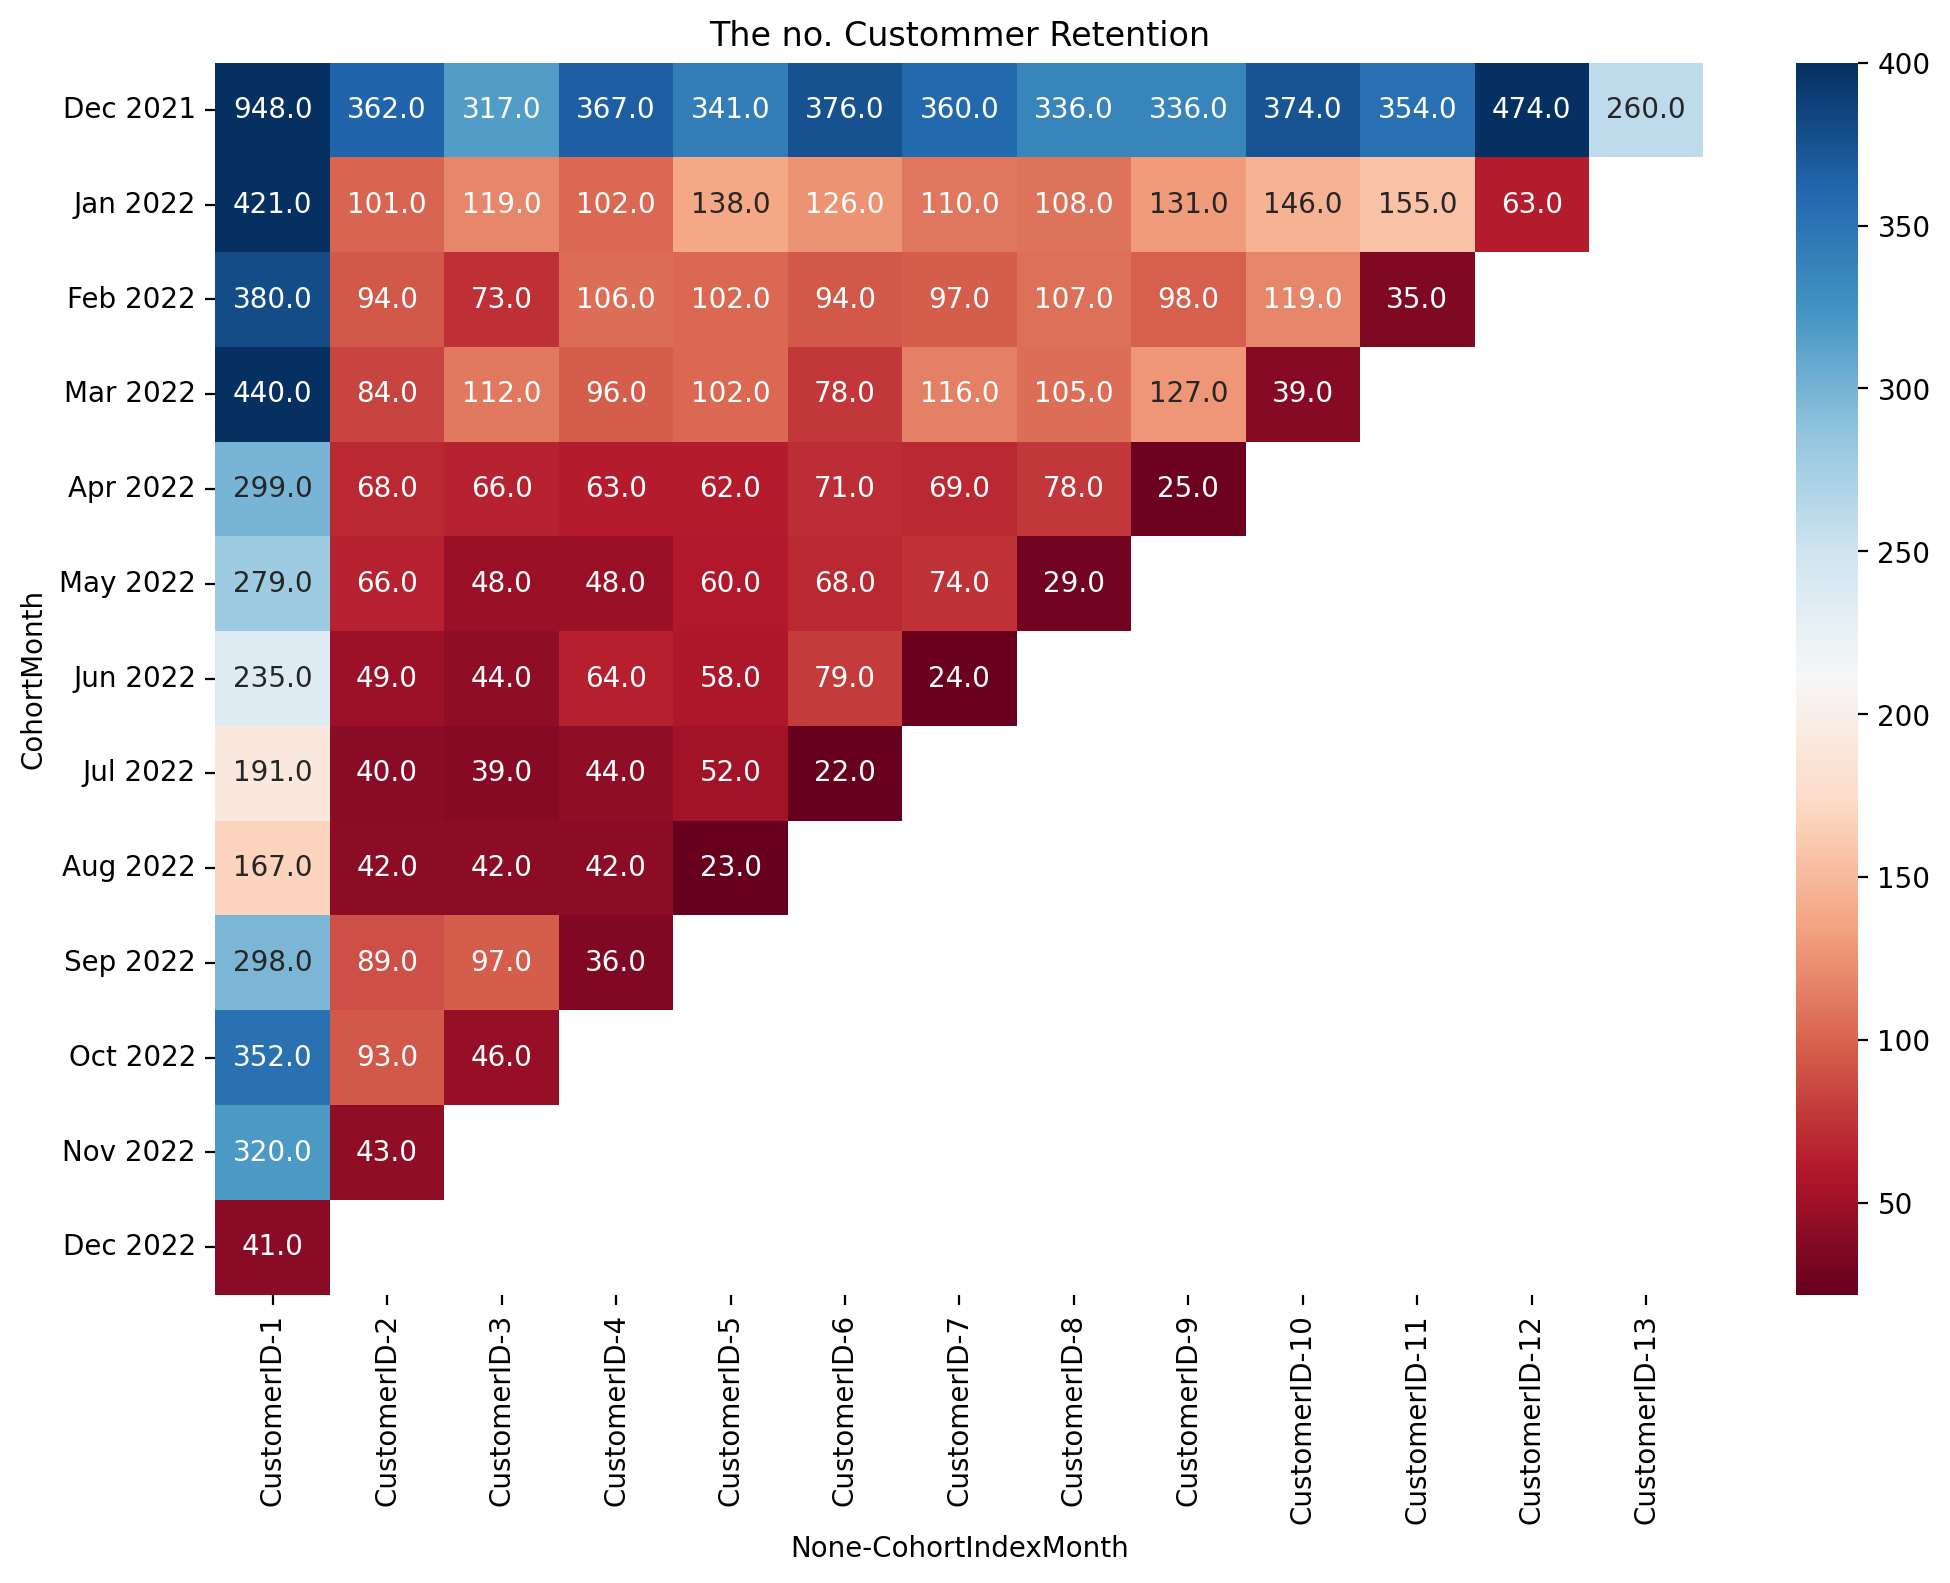

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure( figsize = (12,8), dpi =200)
sns.heatmap(data = cohort_data, annot = True, fmt = ".1f", cmap = "RdBu", vmax = 400)
plt.title("The no. Custommer Retention")
plt.show();

From the color bar, which column is the more blue it has, the higher its value and otherwise, the column with more red color has lower value. We use heatmap because colors are usually used to represent the magnitude of the values in each cell. This makes it easier to visually compare values across different columns or rows, as the eye can quickly pick up on differences in color intensity.

For example, in Dec 2021, the first cell with the value of 948 that shows the rate access to online retail web is very high. However, from the 2nd cell to the end, we see the customer return rate starts to decrease slightly. At the end cell in this range, the total of returning clients just has 260, that is still a good number. 
But in 2020, we see a clear change in the number of returning customers over each month of the year. It becomes decrease untill December of the year. The clients are gradually decreasing and show no sign of returning 

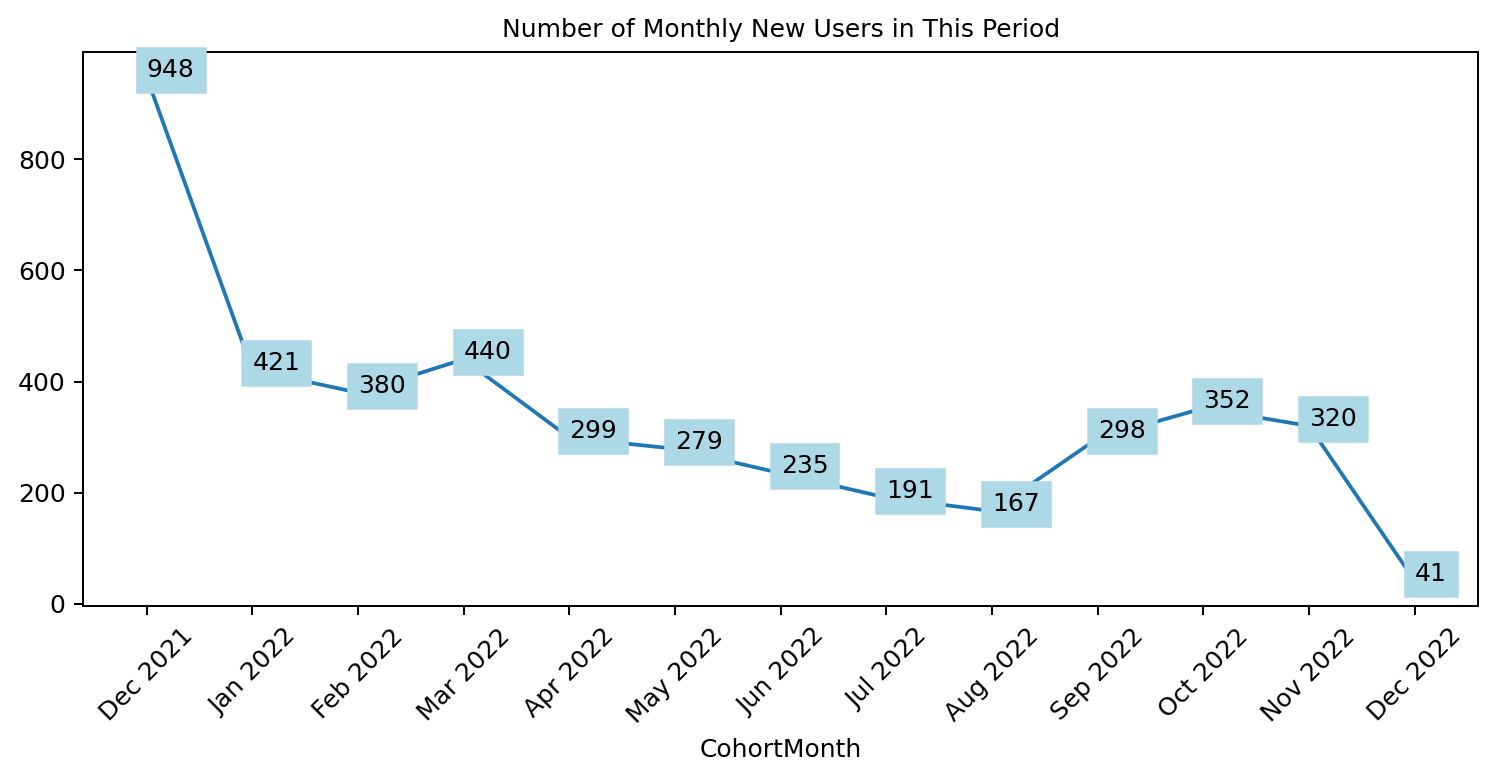

In [9]:
plt.figure(figsize=(10, 4), dpi=180)
xlabel = cohort_data['CustomerID'][1].index

sns.lineplot(x=xlabel, y=cohort_data['CustomerID'][1].values, marker="o")
plt.title('Number of Monthly New Users in This Period', fontsize=10)
plt.xticks(rotation=45)

# set the number text
for x, y in zip (cohort_data['CustomerID'][1].index, cohort_data['CustomerID'][1].values):
    plt.text(x = x, y = y, s = "{:.0f}".format(y), color = 'black').set_backgroundcolor('lightblue')
plt.show()


We use the data of the first column in `cohort_data` to see the big change by each period of the year. The beginning of Dec 2021 with the highest value of 948, but from Jan 2022 to the end, we see the uneven distribution that indicates the customer retention rate is very low and the policy don't apply well. Clients are decreasing and very few are returning.

We need to compute the percentage of clients who return to make a purchase. We will process it by the table here

In [ ]:
cohort_first = cohort_data.iloc[:,0]
retention = cohort_data.divide(cohort_first, axis = 0)
retention = retention.round(3) * 100
retention

CustomerID                                                  \
CohortIndexMonth         1     2     3     4     5     6     7     8     9    
CohortMonth                                                                   
Dec 2021              100.0  38.2  33.4  38.7  36.0  39.7  38.0  35.4  35.4   
Jan 2022              100.0  24.0  28.3  24.2  32.8  29.9  26.1  25.7  31.1   
Feb 2022              100.0  24.7  19.2  27.9  26.8  24.7  25.5  28.2  25.8   
Mar 2022              100.0  19.1  25.5  21.8  23.2  17.7  26.4  23.9  28.9   
Apr 2022              100.0  22.7  22.1  21.1  20.7  23.7  23.1  26.1   8.4   
May 2022              100.0  23.7  17.2  17.2  21.5  24.4  26.5  10.4   NaN   
Jun 2022              100.0  20.9  18.7  27.2  24.7  33.6  10.2   NaN   NaN   
Jul 2022              100.0  20.9  20.4  23.0  27.2  11.5   NaN   NaN   NaN   
Aug 2022              100.0  25.1  25.1  25.1  13.8   NaN   NaN   NaN   NaN   
Sep 2022              100.0  29.9  32.6  12.1   NaN   NaN   NaN   NaN   NaN   
Oct 2022              100.0  26.4  13.1   NaN   NaN   NaN   NaN   NaN   NaN   
Nov 2022              100.0  13.4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Dec 2022              100.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

                                          
CohortIndexMonth    10    11    12    13  
CohortMonth                               
Dec 2021          39.5  37.3  50.0  27.4  
Jan 2022          34.7  36.8  15.0   NaN  
Feb 2022          31.3   9.2   NaN   NaN  
Mar 2022           8.9   NaN   NaN   NaN  
Apr 2022           NaN   NaN   NaN   NaN  
May 2022           NaN   NaN   NaN   NaN  
Jun 2022           NaN   NaN   NaN   NaN  
Jul 2022           NaN   NaN   NaN   NaN  
Aug 2022           NaN   NaN   NaN   NaN  
Sep 2022           NaN   NaN   NaN   NaN  
Oct 2022           NaN   NaN   NaN   NaN  
Nov 2022           NaN   NaN   NaN   NaN  
Dec 2022           NaN   NaN   NaN   NaN

This table shows us that from the 2nd month to the end of the year, it has about 30% to 50% and gradually reduces until just about 13% of people who come back and in Dec 2022, the amount is almost none. But we also need to build the heatmap to evaluate clearly

In [ ]:
plt.figure( figsize = (10,8))
sns.heatmap(data)